# Histogram plots for temp and humid (DC, GH & OUT)

## Import dependencies and data

In [2]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plotting\\plots\\'

In [4]:
# set seaborn style/theme
sns.set_theme()
sns.set_style('white')

In [47]:
# get merged data
data = pd.read_csv(
    data_path + 'data_merged.csv',
    header=[0, 1],
    index_col=[0, 1, 2, 3]
)

# convert index.date col to datetime
#data.index = pd.to_datetime(data.index.values)
data.index = data.index.set_levels(
    levels=pd.to_datetime(data.index.get_level_values(3).values),
    level=3
)

In [6]:
# keep only temp & humidity
data = data[[
    'temperatures',
    'humidity',
]].copy()

# filter out variables
data = data.filter(
    regex='GM10X|DC_GT401|SMHI(?!_)', 
    axis=1
)

## Plot distributions for temperatures

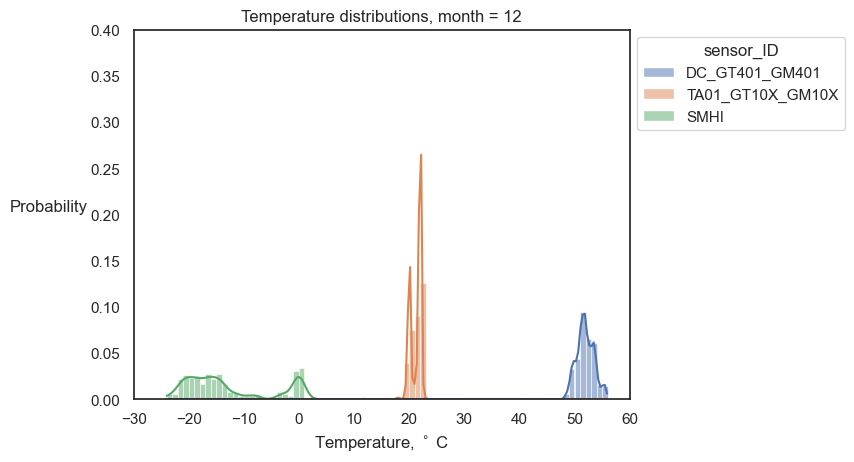

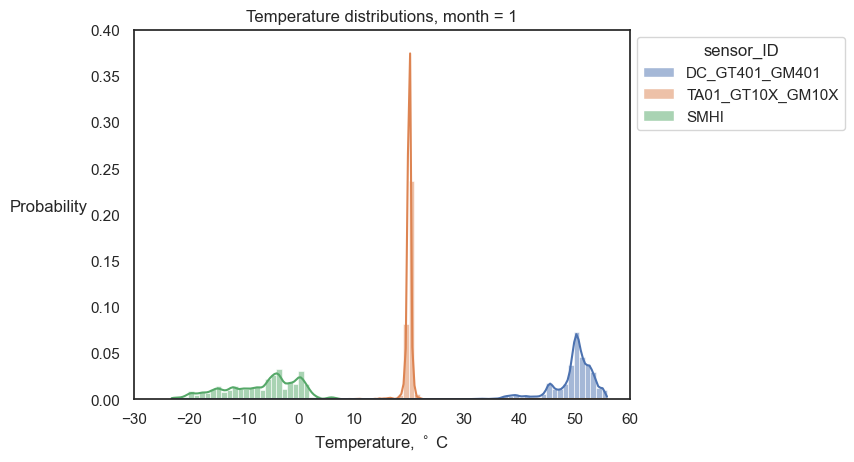

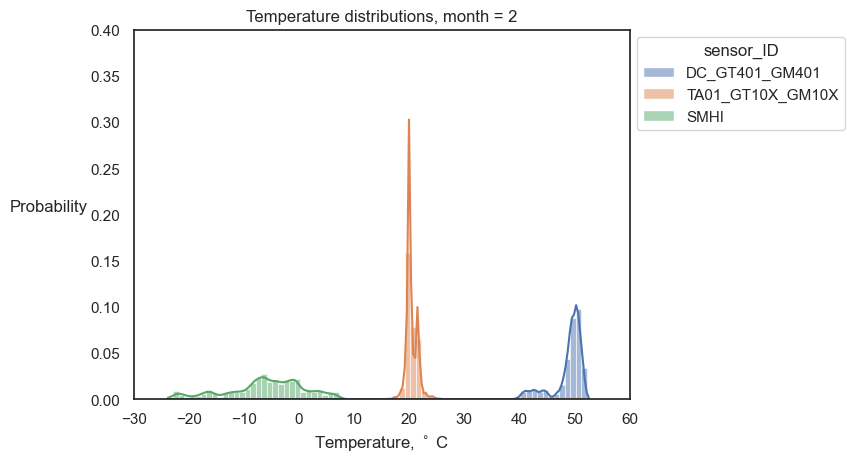

In [11]:
for month in [12, 1, 2]:
    mask = data.index.get_level_values(0) == month
    subset = data[mask]
    
    # drop all index levels except date
    subset = subset.droplevel(
        level=[0, 1, 2], 
        axis=0
    )
    
    ax = sns.histplot(data=subset.temperatures, stat='probability', binwidth=1.0, kde=True, legend='full')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.xlabel('Temperature, $^\circ$ C')
    plt.ylabel('Probability', loc='center', rotation=0, fontsize=12, labelpad=30)
    plt.xlim(-30, 60)
    plt.ylim(0, 0.4)
    plt.title('Temperature distributions, month = {}'.format(month))
    #plt.savefig....
    plt.show()

## Plot histograms for humidity

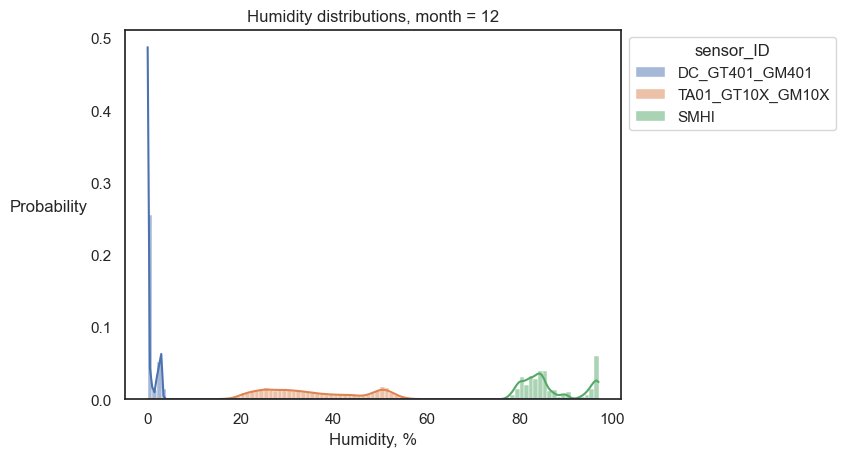

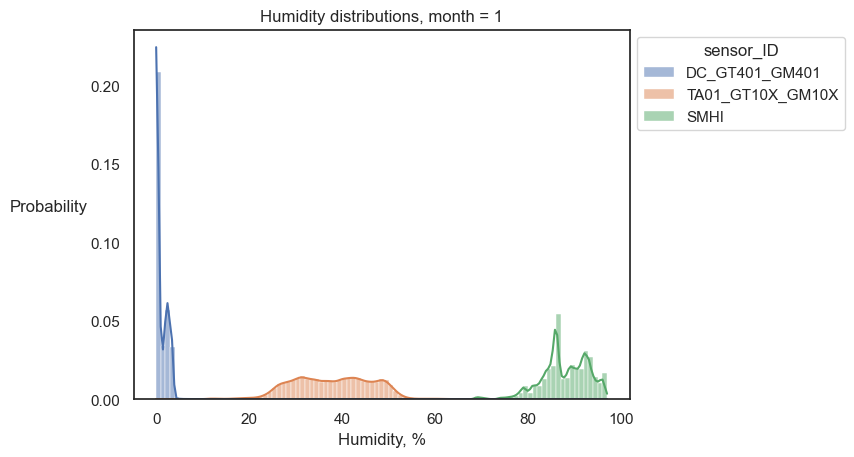

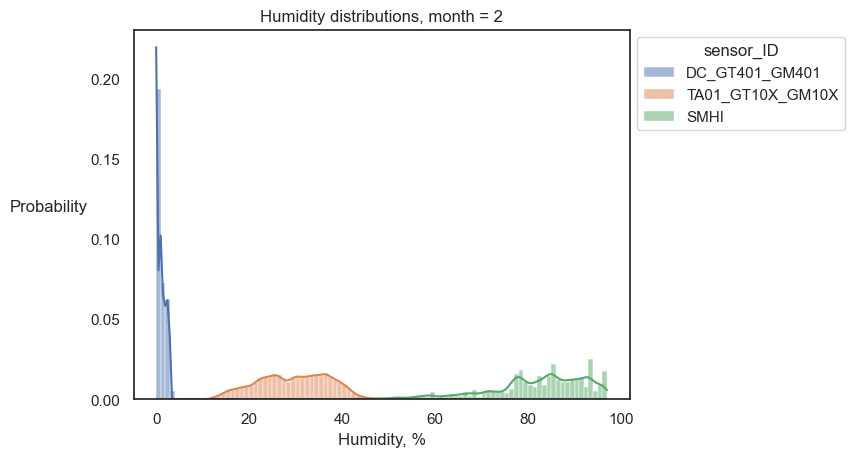

In [12]:
for month in [12, 1, 2]:
    mask = data.index.get_level_values(0) == month
    subset = data[mask]
    
    # drop all index levels except date
    subset = subset.droplevel(
        level=[0, 1, 2], 
        axis=0
    )
    
    ax = sns.histplot(data=subset.humidity, stat='probability', binwidth=1.0, kde=True, legend='full')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.xlabel('Humidity, %')
    plt.ylabel('Probability', loc='center', rotation=0, fontsize=12, labelpad=30)
    plt.title('Humidity distributions, month = {}'.format(month))
    #plt.savefig....
    plt.show()

## Airflow vs. temp data 

In [48]:
import numpy as np

In [53]:
data = data.groupby(['month', 'day']).mean()

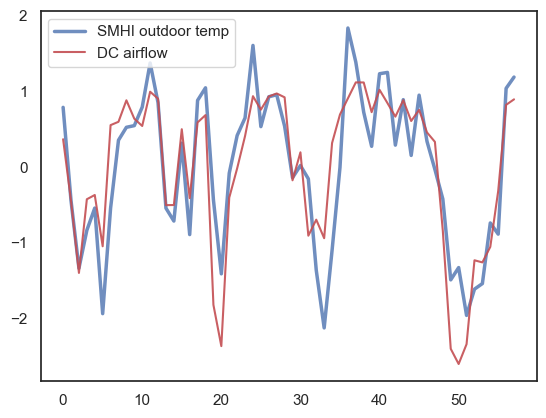

In [56]:
flows = data.flow.TA01_GP101_default.values
temps1 = data.temperatures.DC_GT401_GM401.values
temps2 = data.temperatures.SMHI.values

#plt.plot((temps1 - np.mean(temps1)) / np.std(temps1), label='DC temp', linewidth=2.5, c='b', alpha=0.8)
plt.plot((temps2 - np.mean(temps2)) / np.std(temps2), label='SMHI outdoor temp', linewidth=2.5, c='b', alpha=0.8)
plt.plot(-(flows - np.mean(flows)) / np.std(flows), label='DC airflow', linewidth=1.5, c='r', alpha=0.9)
plt.legend()
plt.show()